# Module 4 Assignment: Feature Selection & Dimensionality Reduction 
### Group members: Gege Li, Zhijing Zhang

## 1) Introduction

Miles per gallon car is a measure of the attributes that a gallon of fuel can make a car diversify. Before buying a car, consumers usually consider the efficiency and fuel economy of the car to be purchased. Our ideal car is a car with low fuel consumption. This project uses the automotive data set provided by UCI, analyzes these data, finds the most suitable variables through dimensionality reduction and feature selection, and establishes and determines the most accurate prediction model to realize the prediction of automobile gas mileage.

Steps:
1. Load Data.
2. Data Preparation: check the types and if null value exists.Fill missing values(continous data by mean values, delete categogical missing values).
3. Basic Exploratory Data Analysis (EDA) show the nature of each  variables.
4. Exploratory Data Analysis (EDA) to explore correlations between the predictors and the predictand.
5. Dimensionality Reduction(PCA) and Feature Selection(Back-forward).
6. Model Training + Selection + Testing: Linear Regression Model Construction + K-Fold Cross Validation.
7. Conclusions.


## 2) Exploratory Data Analysis
In this part, we will have three different part: (a) Data Overview, (b) The Nature of Each Variables, (C) The Relationship among Variables.

__a.Data Overview__

In [1]:
import numpy as np
import pandas as pd

#read the data set from Github repository and load it into a Pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/gegeli638/DAV-6150/master/M4_Data.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [2]:
# Rename the columns
df.columns = ['symboling','normalizedlosses', 'make', 'fueltype', 'aspiration', 'doors', 'bodystyle', 'drivewheels', 
              'enginelocation', 'wheelbase', 'length', 'width', 'height', 'curbweight', 'enginetype', 'cylinders', 
              'enginesize', 'fuelsystem', 'bore', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 
              'citympg', 'highwaympg', 'price']
df.head()

,symboling,normalizedlosses,make,fueltype,aspiration,doors,bodystyle,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


##### We find that there are so many '?' in this dataframe, so we need to change '?' into nan and then fill the missing value.

In [3]:
# '?' will change the datatype, so here we change the '?' into NAN
df.replace('?',np.nan, inplace = True)
df.head()

,symboling,normalizedlosses,make,fueltype,aspiration,doors,bodystyle,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling           205 non-null int64
normalizedlosses    164 non-null object
make                205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doors               203 non-null object
bodystyle           205 non-null object
drivewheels         205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
length              205 non-null float64
width               205 non-null float64
height              205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylinders           205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
bore                201 non-null object
stroke              201 non-null object
compressionratio    205 non-null float64
horsepower          203 non-null object
peakrpm      

#### Base on the Attribute Information from here: https://archive.ics.uci.edu/ml/datasets/Automobile , we need to change the datatype.

In [5]:
# using dictionary to convert specific columns 
convert_dict = {'symboling': object, 
                'normalizedlosses': float,
                'bore': float,
                'stroke': float,
                'horsepower': float,
                'peakrpm': float,
                'price': float
               } 
  
df = df.astype(convert_dict) 
print(df.dtypes) 

symboling            object
normalizedlosses    float64
make                 object
fueltype             object
aspiration           object
doors                object
bodystyle            object
drivewheels          object
enginelocation       object
wheelbase           float64
length              float64
width               float64
height              float64
curbweight            int64
enginetype           object
cylinders            object
enginesize            int64
fuelsystem           object
bore                float64
stroke              float64
compressionratio    float64
horsepower          float64
peakrpm             float64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [6]:
#check the missing value
df.isnull().sum()

symboling            0
normalizedlosses    41
make                 0
fueltype             0
aspiration           0
doors                2
bodystyle            0
drivewheels          0
enginelocation       0
wheelbase            0
length               0
width                0
height               0
curbweight           0
enginetype           0
cylinders            0
enginesize           0
fuelsystem           0
bore                 4
stroke               4
compressionratio     0
horsepower           2
peakrpm              2
citympg              0
highwaympg           0
price                4
dtype: int64

In [7]:
#fill the missing value in continous data by mean
from sklearn.impute import SimpleImputer

# normalizedlosses- mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
array = df.normalizedlosses.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
df.normalizedlosses = predictors_imputed

# bore- mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
array = df.bore.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
df.bore = predictors_imputed

# stroke- mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
array = df.stroke.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
df.stroke = predictors_imputed

# horsepower- mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
array = df.horsepower.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
df.horsepower = predictors_imputed

# peakrpm- mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
array = df.peakrpm.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
df.peakrpm = predictors_imputed

# price- mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
array = df.price.values.reshape(-1,1)
predictors_imputed = imp.fit_transform(array)  
df.price = predictors_imputed

In [8]:
# drop the missing in category data
# Cause only two rows in 'doors', that wouldn't impact the result.

df.dropna(inplace=True)

In [9]:
#check the missing value
df.isnull().sum()

symboling           0
normalizedlosses    0
make                0
fueltype            0
aspiration          0
doors               0
bodystyle           0
drivewheels         0
enginelocation      0
wheelbase           0
length              0
width               0
height              0
curbweight          0
enginetype          0
cylinders           0
enginesize          0
fuelsystem          0
bore                0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
# Describe the 15 continuous data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
normalizedlosses,203.0,121.871921,31.784599,65.00,101.00,122.00,137.000,256.00
wheelbase,203.0,98.781281,6.040994,86.60,94.50,97.00,102.400,120.90
length,203.0,174.113300,12.339090,141.10,166.55,173.20,183.300,208.10
width,203.0,65.915271,2.150274,60.30,64.10,65.50,66.900,72.30
height,203.0,53.731527,2.442526,47.80,52.00,54.10,55.500,59.80
curbweight,203.0,2557.916256,522.557049,1488.00,2145.00,2414.00,2943.500,4066.00
enginesize,203.0,127.073892,41.797123,61.00,97.00,120.00,143.000,326.00
bore,203.0,3.330931,0.271327,2.54,3.15,3.31,3.585,3.94
stroke,203.0,3.254097,0.314858,2.07,3.11,3.29,3.410,4.17
compressionratio,203.0,10.093202,3.888216,7.00,8.60,9.00,9.400,23.00


##### In this part, we
- rename the columns,
- find the NAN, 
- change the data type,
- fill the missing value.


__b. The Nature of Each Variables__

After we went through the introduction from UC Irvine machine learning archive (https://archive.ics.uci.edu/ml/datasets/Automobile), we find that:
- 15 of these features are continuous data, we will use histogram to show the distribution of these attributes.
- 11 of these features are category data, so we will use bar chart to show the nature of these attributes.

In [11]:
# separate the features

continuous_data = [
    'normalizedlosses',
    'wheelbase',
    'length',
    'width',
    'height',
    'curbweight',
    'enginesize',
    'bore',
    'stroke',
    'compressionratio',
    'horsepower',
    'peakrpm',
    'citympg',
    'highwaympg',
    'price'
]

category_data = [
    'symboling',
    'make',                 
    'fueltype',
    'aspiration',
    'doors',        
    'bodystyle',            
    'drivewheels',          
    'enginelocation',       
    'enginetype',      
    'cylinders',          
    'fuelsystem'           
]

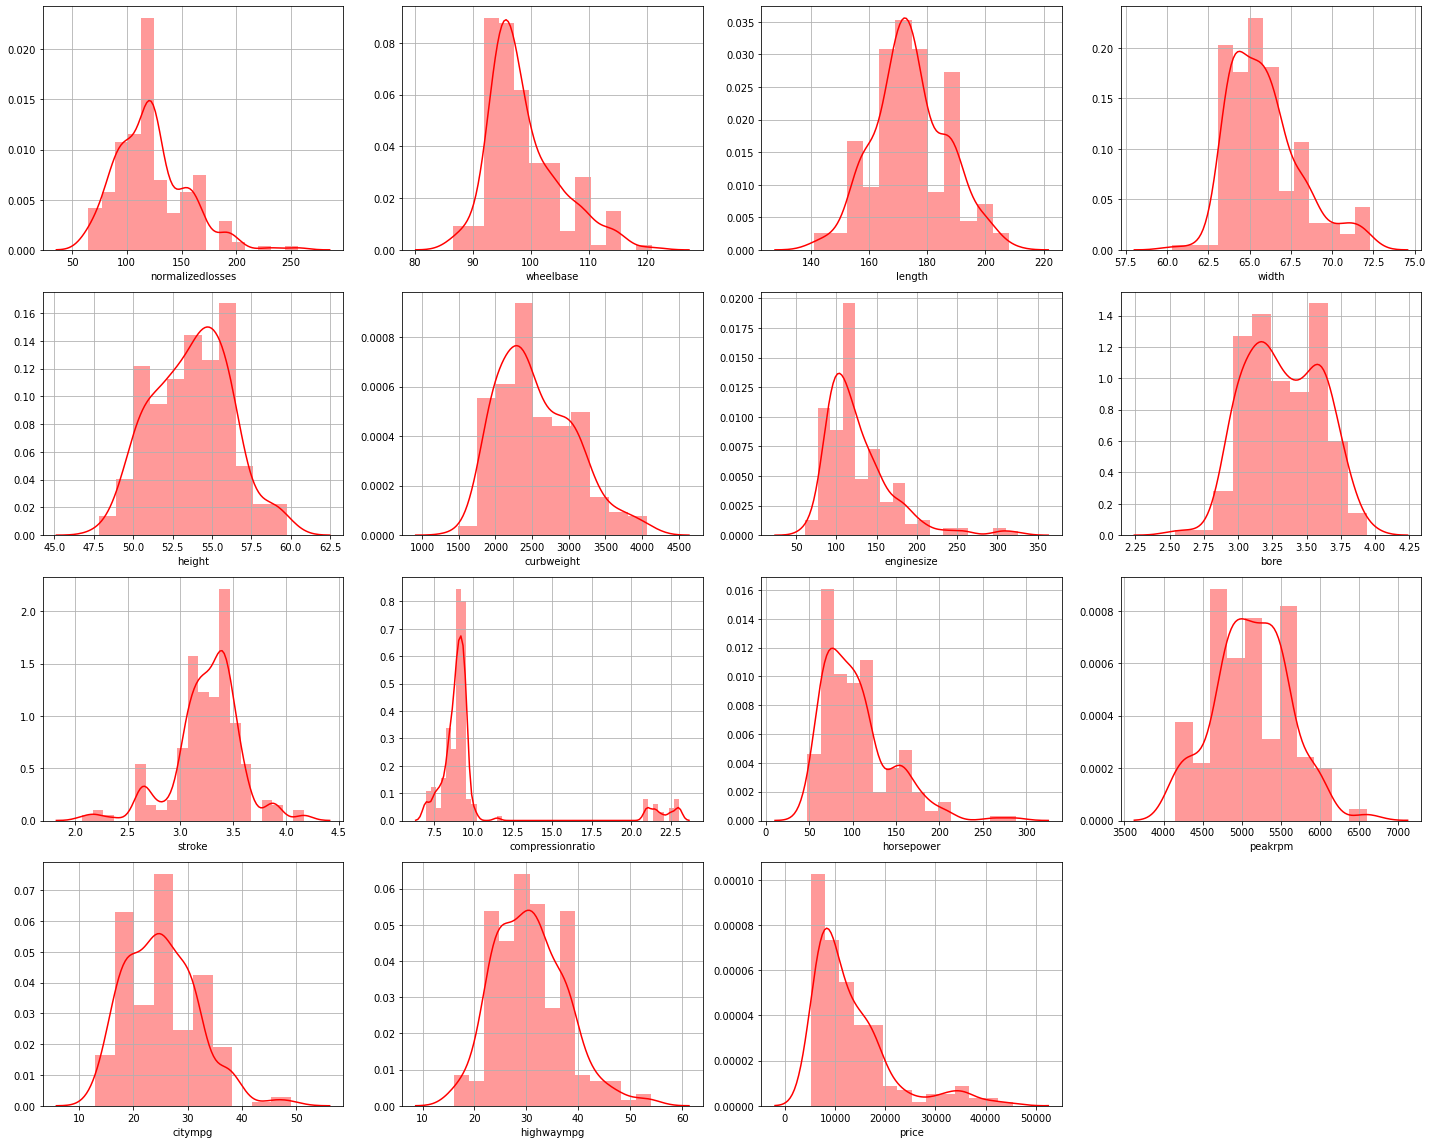

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# distribution - continous data
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(continuous_data)):
    plt.subplot(4, 4, i + 1)
    sns.distplot(df[col], color = 'r', kde = True)
    plt.grid()
    plt.tight_layout()

##### The conclusions that can be drawn from the histograms above are:
- All variables are not in the same range
- Response variable tilts slightly to the right
- Most continuous variables are normally distributed, among which compressionratio, horsepower, price, enginesize are obviously inclined to the right, and height and stroke are inclined to the left
- The peak of normalized losses is the most obvious, the peaks of bore and peakrpm are not obvious

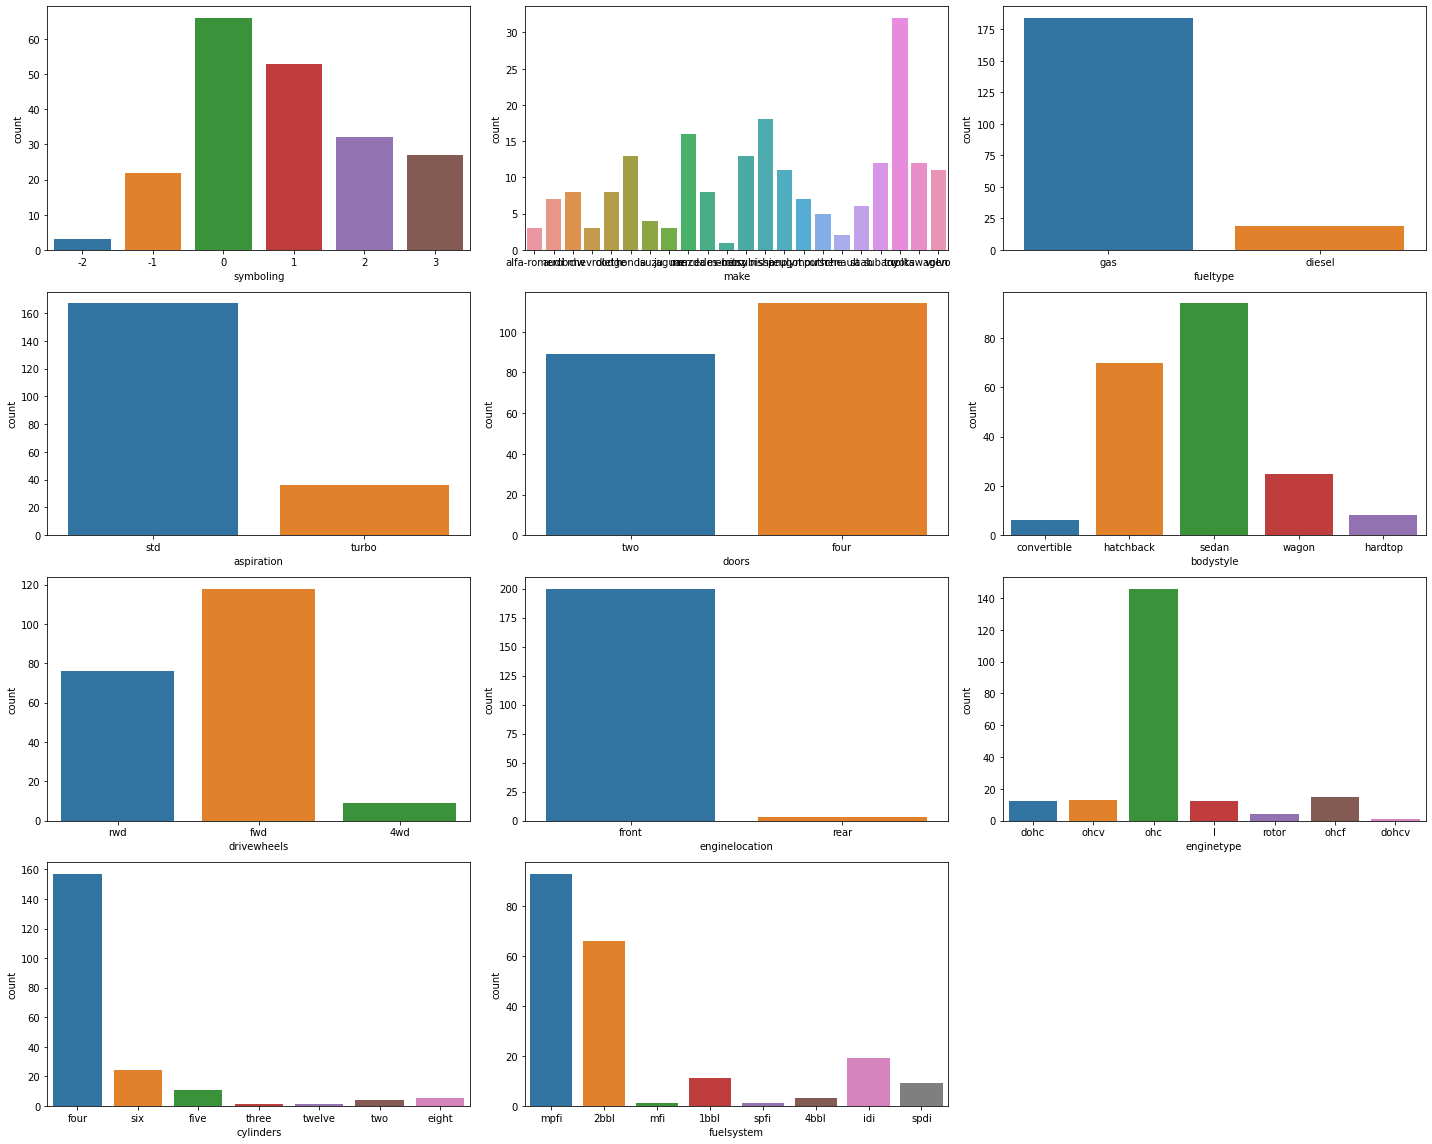

In [13]:
# bar chart - category data
fig = plt.figure(figsize = (20, 16))

for i, col in enumerate(list(category_data)):
    ax1 = fig.add_subplot(4, 3, i + 1)
    sns.catplot(x=col,data=df, kind='count', ax=ax1)
    plt.close(2)
    #plt.grid()
    plt.tight_layout()

##### The conclusions that can be drawn from the bar charts above are:
- All variables are not in the same range
- The'make' attribute, equivalent to the car brand manufacturer, has the most value changes
- The gap between the values of'fueltype','enginelocation','enginetype','cylinders', and'fuelsystem' is very large
- Among them, the brand of Toyota has the largest proportion, the engine type ohc has the largest proportion, the fuel type gas is the majority, the engine position is in front of the majority, the four cylinders are the majority, and the fuel system is more mpfi.

__c.Relationship__

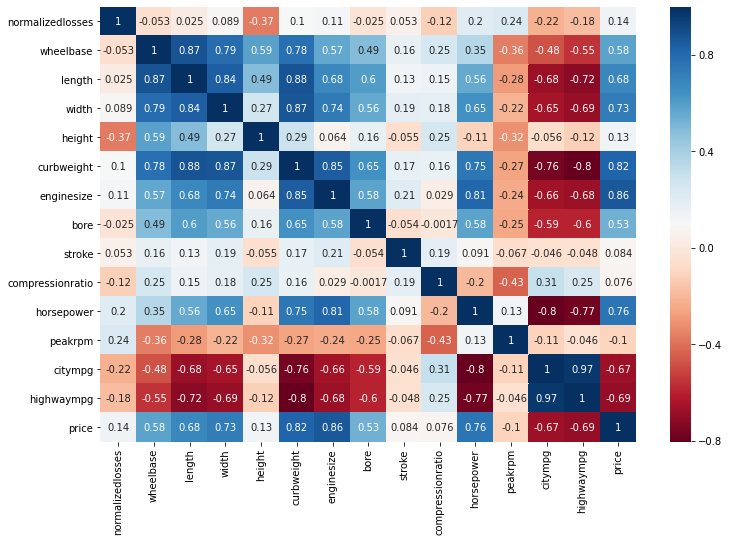

In [14]:
#correlation heatmap 
plt.figure(figsize=(12,8))
ax = sns.heatmap(df.corr(), cmap='RdBu', annot=True)
plt.show()

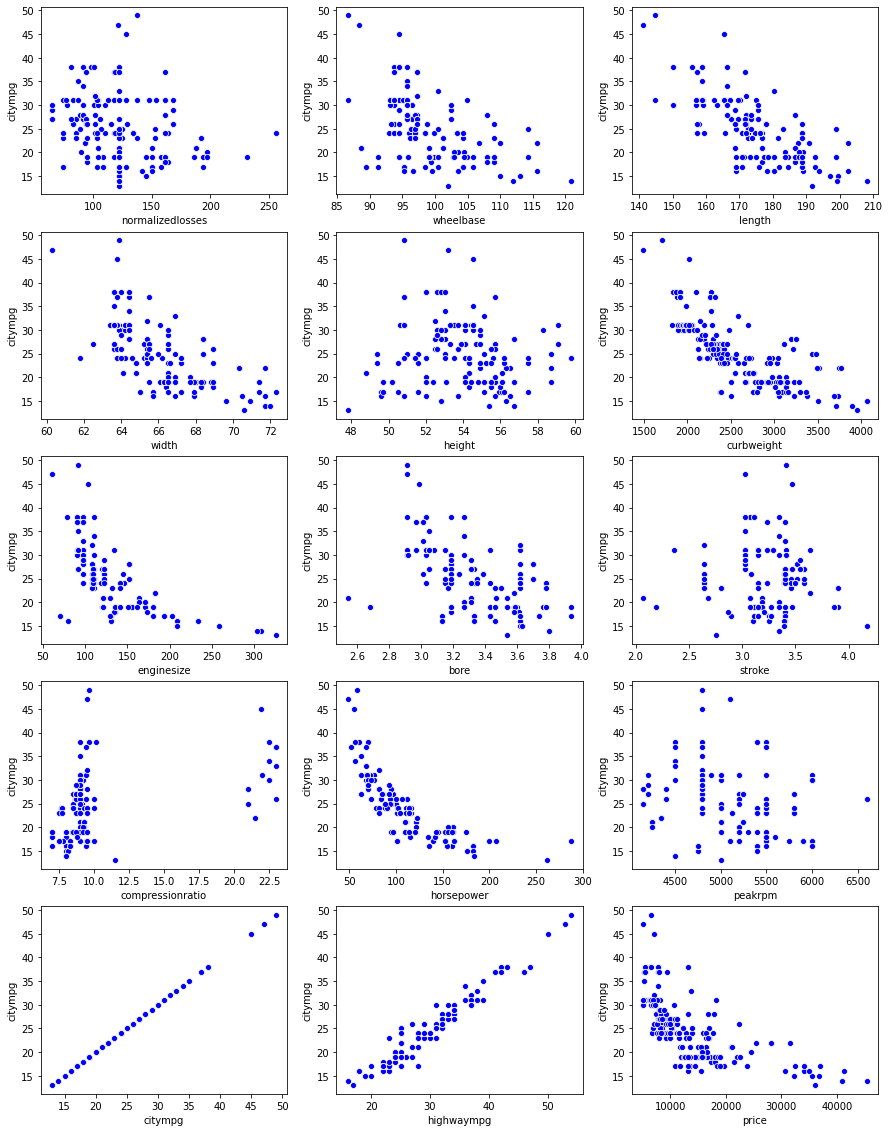

In [15]:
# correlation -scatterplot -continous data
plt.figure(figsize = (15, 20))
for i, col in enumerate(list(continuous_data)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(x =col, y ='citympg' , data = df, color = 'b')

##### The conclusions that can be drawn from the heatmap and scatterplots above are:
- Highway-mpg has the strongest relationship(0.97) with city-mpg.
- hourse-power(-0.8), curbweight(-0.76), length(-0.68), price(0.68), and engine-size(-0.66) have a clear relationship(more than |0.65|) with city-mpg.
- For other features, we can't see strong relationship with city-mpg in scatter plot.

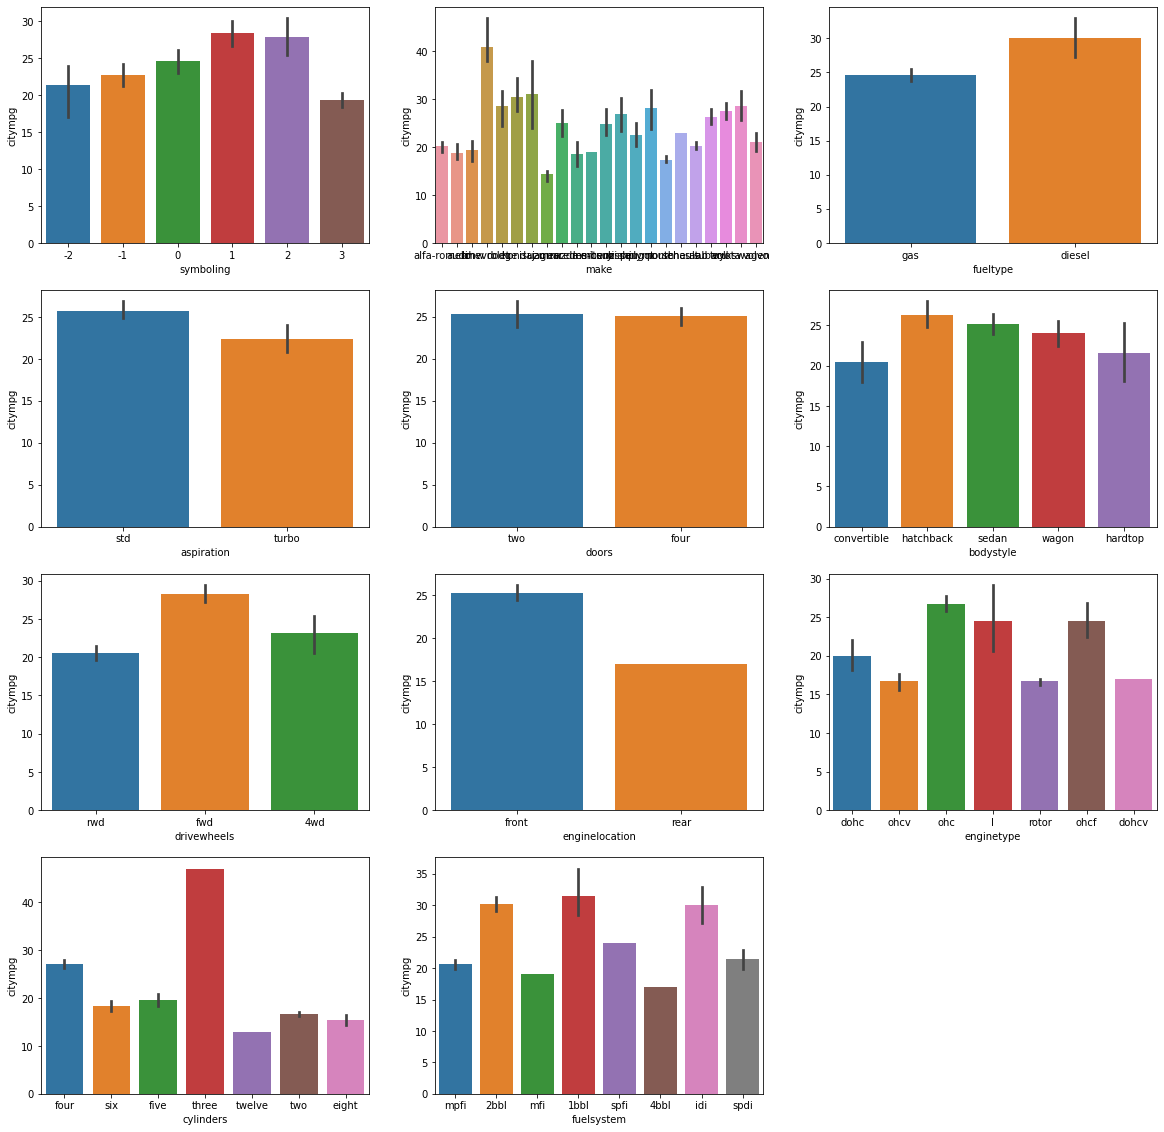

In [16]:
# correlation -barplot -category data
plt.figure(figsize = (20, 20))
for i, col in enumerate(list(category_data)):
    plt.subplot(4, 3, i + 1)
    sns.barplot(x=col, y="citympg", data=df)

##### The conclusions that can be drawn from the bar plots above are:
- Different doors have nearly the same city-mpg.
- Three cylinders has the most city-mpg.
- Chevrolet make has the most city-mpg.
- For other features, there are not strong trend to city-mpg.

## 3) Feature Selection and Dimensionality Reduction & Models & Evaluations
We put 'Feature Selection / Dimensionality Reduction'Part and 'Regression Model Evaluation'Part together because we evaluate the model directly after building the model.

In [18]:
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, make_scorer

We will construct __three models__ and compare:
1. All variables -- k-cross evaluation
2. PCA conducts Dimensionality Reduction -- k-cross evaluation
3. Back-forward for Feature Selection -- k-cross evaluation

##### Evaluation criteria and functions:

1. All use scikit-learn's Cross Validation Capabilities for evaluation to prevent deviation of results caused by inconsistent evaluation models.
2. cv = 10, perform 10 cross-validations. Our original data is not very large, so choose 10 crosses to improve accuracy.
3. cross_validation.cross_val_score, which uses the scoring parameter to control the quality of the estimator.
4. The higher the score of the model, the higher the accuracy of the proof. The scoring parameter uses scoring=make_scorer, the smaller the better.
5. mean_squared_error: mean squared error regression loss, a measure that reflects the degree of difference between the estimated and the estimated quantity.

##### 1. All variables -- k-cross evaluation

Except for the response variables, all remaining variables are used for linear statistical equations, and scikit-learn's Cross Validation Capabilities is used to obtain prediction accuracy. As a control group

In [19]:
# drop the response column
ddd =df.copy()
ddd.drop(columns=['citympg'],inplace=True)

In [20]:
#check the columns
ddd.columns

Index(['symboling', 'normalizedlosses', 'make', 'fueltype', 'aspiration',
       'doors', 'bodystyle', 'drivewheels', 'enginelocation', 'wheelbase',
       'length', 'width', 'height', 'curbweight', 'enginetype', 'cylinders',
       'enginesize', 'fuelsystem', 'bore', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'highwaympg', 'price'],
      dtype='object')

In [21]:
#gather features
features = "+".join(ddd)
# get y and X dataframes based on this regression:
y, X = dmatrices('citympg ~' + features, df, return_type='dataframe')

model = LinearRegression()

#print the result
print((cross_val_score(model, X, y, cv=10, scoring=make_scorer(mean_squared_error))).mean())

4.054308268023755


##### 2. PCA conducts Dimensionality Reduction  --  k-cross evaluation

There are many methods for Dimensionality Reduction, and PCA is used for Dimensionality Reduction, because when the variance distribution of different dimensions of the data set is uneven, PCA only needs to measure the amount of information by variance, not affected by factors outside the data set, and each main The orthogonality between the components can eliminate the mutual influence factors between the original data components. In addition, the calculation method of PCA is simple, and the main operation is eigenvalue decomposition, which is easy to implement.

In [22]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import model_selection

In [23]:
#gather features
features = "+".join(ddd)
# get y and X dataframes based on this regression:
y, X = dmatrices('citympg ~' + features, df, return_type='dataframe')
pca = PCA(n_components=0.5)
# apply the PCA function to the X
pca.fit(X.values)
X_t = pca.transform(X.values)

In [24]:
#apply the results of the PCA to Linear Regression
model = LinearRegression()

#print the result
print((cross_val_score(model, X_t, y, cv=10, scoring=make_scorer(mean_squared_error))).mean())

24.51973209373216


##### 3. Back-forward for Feature Selection   --  k-cross evaluation

- Although the feature filter method is fast, for the top-ranked features, if they are highly correlated, redundant features are introduced, which wastes computing resources. For the features that are ranked lower, although the independent effect is not significant, the combination with other features may be very helpful to the model, so that valuable features are lost. In our data, because there are many professional attributes involved, and our professional knowledge is limited, so the use of filter may lose valuable features.
- The Embedded method is too complicated and involves too many algorithms, so it is not suitable for beginners, so it is excluded.
- Finally, we chose the Backward elimination method in Wrapper Methods, without letting go of any valid data. Although this method will occupy more memory space and computing resources, considering that our original data is not particularly large, it can be temporarily Ignore the complexity of the calculation and focus on accuracy (relatively speaking).

Steps:
1. Choose a significance level (significance_level = 0.05 with a 95% confidence).
2. Fit a full model including all the features.
3. Consider the feature with highest p-value. If the p-value > significance level then go to Step 4, otherwise terminate the process.
4. Remove the feature which is under consideration.
5. Fit a model without this feature. Repeat the entire process from Step 3.



Use the P value of the variable as the screening criterion. In backward elimination, we start with the full model (including all the independent variables) and then remove the insignificant feature with highest p-value(> significance level). This process repeats again and again until we have the final set of significant features.

In [25]:
from sklearn.metrics import mean_squared_error, make_scorer

data=df.copy()
target=y
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    result =(np.inf, None)
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)          
            model = LinearRegression()
            X = data[features].values
            score = (cross_val_score(model, X, y, cv=10, scoring=make_scorer(mean_squared_error))).mean()            
            if (score < result[0]):
                result = (score, features)
        else:
            break 
    return result

In [26]:
#check
backward_elimination(X,y)

(2.046202868403355,
 ['Intercept',
  'symboling[T.0]',
  'make[T.bmw]',
  'make[T.chevrolet]',
  'make[T.honda]',
  'make[T.isuzu]',
  'make[T.mercury]',
  'make[T.nissan]',
  'make[T.subaru]',
  'make[T.toyota]',
  'make[T.volvo]',
  'aspiration[T.turbo]',
  'bodystyle[T.wagon]',
  'enginetype[T.ohc]',
  'cylinders[T.six]',
  'curbweight',
  'enginesize',
  'bore',
  'compressionratio',
  'horsepower',
  'highwaympg'])

The use built-in functions SequentialFeatureSelector() for comparison.

In [27]:
#install and load the library
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [28]:
#build the model
sbs = SFS(LinearRegression(), 
          k_features='best',
          forward=False, 
          floating=False,
          scoring=make_scorer(mean_squared_error), # for regressors
           cv=10)
sfs1 = sbs.fit(X, y)

In [29]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 20, 24, 25, 26, 38, 43, 44, 45, 47, 57, 62, 65]


In [30]:
#check
sfs1.k_feature_names_

('symboling[T.-1]',
 'symboling[T.0]',
 'symboling[T.1]',
 'symboling[T.2]',
 'symboling[T.3]',
 'make[T.audi]',
 'make[T.bmw]',
 'make[T.dodge]',
 'make[T.isuzu]',
 'make[T.jaguar]',
 'make[T.mazda]',
 'make[T.mercedes-benz]',
 'make[T.mercury]',
 'make[T.mitsubishi]',
 'make[T.nissan]',
 'make[T.porsche]',
 'make[T.toyota]',
 'make[T.volkswagen]',
 'make[T.volvo]',
 'enginetype[T.l]',
 'cylinders[T.five]',
 'cylinders[T.four]',
 'cylinders[T.six]',
 'cylinders[T.twelve]',
 'wheelbase',
 'enginesize',
 'compressionratio')

In [31]:
#print the result
sfs1.k_score_

4.5744114654143015e+25

- Here is our best model!
- Although the results obtained by the two Backwards are not completely consistent, they can prove that the Backward method is the most accurate. At the same time, Backward is also the longest time-consuming method.
- Backward is more accurate than PCA and more accurate than the original model.

## 4) Conclusions
Obviously, the data processed by Dimensionality Reduction and Feature Selection can be more accurately applied to the prediction model of linear regression than the original data. In our data, the accuracy of the processed model is almost higher than that of the model obtained using the original data. Double. Some variables, such as the car brand ('make'), are something we didn't think of before. The fuel consumption gap between different brands has a great influence on the model. For variables such as num-of-cylinders that we predict have a greater impact, the actual impact is not large. The emergence of enginetype, fuelsystem and bodystyle is not surprising.

### References

1. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
2. http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/
3. https://www.kdnuggets.com/2018/06/step-forward-feature-selection-python.html
4. https://seaborn.pydata.org/generated/seaborn.barplot.html